In [59]:
import pandas as pd
import numpy as np
from collections import Counter
import nltk
from nltk.corpus import stopwords
from string import punctuation
import warnings
from langdetect import detect_langs

warnings.filterwarnings("ignore")

df = pd.read_csv('data/fake_or_real_news.csv')

#替换列名
df.rename(columns={"label":"fake"}, inplace=True)
label_map = {"FAKE": 1, "REAL": 0}
df['fake'] = df['fake'].map(label_map)

#丢掉非英文的
def return_lang(x):
    try:
        language = detect_langs(x)[0].lang
    except Exception:
        language = 'other'
    return language
df['language'] = df['text'].apply(return_lang)


df = df[df['language']=='en']

#丢掉无用的列
df = df.drop(['Unnamed: 0','title_vectors','language','title'],axis=1)

df = df.reset_index(drop=True)

In [ ]:
#特殊字符数量
#df['hashtags']=df['text'].apply(lambda sen:len([x for x in sen.split() if x.startswith("#")]))
#数字数量
df['numerics']=df['text'].apply(lambda sen:len([x for x in sen.split() if x.isdigit()]))

import re

#正则表达式去掉一些无用的形式
def execute(x):
    temp=x
    pat1 = "[a-zA-Z]+'t"
    #否定词全部变为not
    temp = re.sub(pat1, 'not', temp)
    pat2 = "[a-zA-Z]+’t"
    #否定词全部变为not
    temp = re.sub(pat2, 'not', temp)
    #邮箱地址
    pat3="[\w!#$%&'*+/=?^_`{|}~-]+(?:\.[\w!#$%&'*+/=?^_`{|}~-]+)*@(?:[\w](?:[\w-]*[\w])?\.)+[\w](?:[\w-]*[\w])?"
    temp = re.sub(pat3, 'email', temp)
    #url网址
    pat4="[a-zA-z]+://[^\s]*"
    temp = re.sub(pat4, 'url', temp)
    #日期
    pat5="([0-9]{3}[1-9]|[0-9]{2}[1-9][0-9]{1}|[0-9]{1}[1-9][0-9]{2}|[1-9][0-9]{3})-(((0[13578]|1[02])-(0[1-9]|[12][0-9]|3[01]))|((0[469]|11)-(0[1-9]|[12][0-9]|30))|(02-(0[1-9]|[1][0-9]|2[0-8])))"
    temp = re.sub(pat5, 'date', temp)
    #电话号码 qq号码等 各种数字串
    pat6="[0-9]+"
    temp = re.sub(pat6, 'number', temp)
    return temp

def text_execute(x):
    return execute(x['text'])

#def title_execute(x):
#    return execute(x['title'])
    

df['text'] = df.apply(text_execute,axis=1)

In [3]:
import nltk
from nltk.corpus import stopwords

def splitSentence(paragraph):
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = tokenizer.tokenize(paragraph)
    return len(sentences)
#text

#统计句子的数量
df['sentence_count']=df['text'].apply(splitSentence)
#统计单词的数量
df['word_count']=df['text'].apply(lambda x:len(str(x).split(" ")))
#统计文章总长度
df['char_count']=df['text'].str.len()
#统计文章平均一个单词的字符长度
df['avg_word']=df.apply(lambda x:x['char_count']/x['word_count'],axis=1)
#统计文章平均一个句子的单词长度
df['avg_sentence']=df.apply(lambda x:x['word_count']/x['sentence_count'],axis=1)
#停用词数量
stop=stopwords.words('english')
df['stopwords']=df['text'].apply(lambda sen:len([x for x in sen.split() if x in stop]))
#大写字母数量
df['upper']=df['text'].apply(lambda sen:len([x for x in sen.split() if x.isupper()]))

In [32]:
#from textblob import TextBlob
#df['text'].apply(lambda x: str(TextBlob(x).correct()))
df_fake=df[df['fake']==1]
df_real=df[df['fake']==0]

In [5]:
df

,text,fake,numerics,sentence_count,word_count,char_count,avg_word,avg_sentence,stopwords,upper
0,"Daniel Greenfield, a Shillman Journalism Fello...",1,0,87,1298,7513,5.788136,14.919540,528,38
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,1,26,446,2641,5.921525,17.153846,172,3
2,U.S. Secretary of State John F. Kerry said Mon...,0,2,16,423,2549,6.026005,26.437500,166,6
3,"— Kaydee King (@KaydeeKing) November number, n...",1,12,17,404,2715,6.720297,23.764706,125,5
4,It's primary day in New York and front-runners...,0,4,21,307,1850,6.026059,14.619048,117,3
5,"\nI’m not an immigrant, but my grandparents ...",1,2,97,2348,13376,5.696763,24.206186,952,98
6,"Share This Baylee Luciani (left), Screenshot o...",1,0,18,553,3173,5.737794,30.722222,250,4
7,A Czech stockbroker who saved more than number...,0,4,5,123,802,6.520325,24.600000,45,2
8,Hillary Clinton and Donald Trump made some ina...,0,14,79,2288,13924,6.085664,28.962025,889,49
9,Iranian negotiators reportedly have made a las...,0,3,32,692,4335,6.264451,21.625000,263,10


In [52]:
df_fake

,text,fake,numerics,sentence_count,word_count,char_count,avg_word,avg_sentence,stopwords,upper
0,"Daniel Greenfield, a Shillman Journalism Fello...",1,0,87,1298,7513,5.788136,14.919540,528,38
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,1,26,446,2641,5.921525,17.153846,172,3
3,"— Kaydee King (@KaydeeKing) November number, n...",1,12,17,404,2715,6.720297,23.764706,125,5
5,"\nI’m not an immigrant, but my grandparents ...",1,2,97,2348,13376,5.696763,24.206186,952,98
6,"Share This Baylee Luciani (left), Screenshot o...",1,0,18,553,3173,5.737794,30.722222,250,4
12,Click Here To Learn More About Alexandra's Per...,1,2,15,212,1449,6.834906,14.133333,64,3
13,"October number, number at number:number am \nP...",1,2,3,53,305,5.754717,17.666667,21,0
16,Shocking! Michele Obama & Hillary Caught Glamo...,1,1,5,142,918,6.464789,28.400000,44,4
17,number \nHillary Clinton has barely just lost ...,1,1,18,283,1525,5.388693,15.722222,114,7
21,"November number, number By numberwire Leave a ...",1,3,4,204,1229,6.024510,51.000000,50,47


In [53]:
df_real

,text,fake,numerics,sentence_count,word_count,char_count,avg_word,avg_sentence,stopwords,upper
2,U.S. Secretary of State John F. Kerry said Mon...,0,2,16,423,2549,6.026005,26.437500,166,6
4,It's primary day in New York and front-runners...,0,4,21,307,1850,6.026059,14.619048,117,3
7,A Czech stockbroker who saved more than number...,0,4,5,123,802,6.520325,24.600000,45,2
8,Hillary Clinton and Donald Trump made some ina...,0,14,79,2288,13924,6.085664,28.962025,889,49
9,Iranian negotiators reportedly have made a las...,0,3,32,692,4335,6.264451,21.625000,263,10
10,"CEDAR RAPIDS, Iowa — “I had one of the most wo...",0,0,33,525,3174,6.045714,15.909091,203,10
11,Donald Trump’s organizational problems have go...,0,1,13,395,2560,6.481013,30.384615,152,6
14,"Killing Obama administration rules, dismantlin...",0,0,1,17,117,6.882353,17.000000,5,0
15,"As more women move into high offices, they oft...",0,32,144,3082,19252,6.246593,21.402778,1140,37
18,"Washington (CNN) For months, the White House a...",0,6,51,1122,7104,6.331551,22.000000,424,4


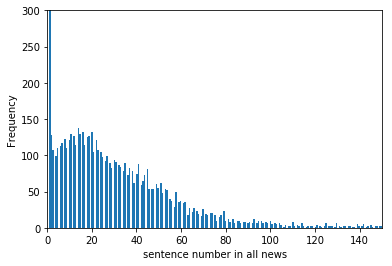

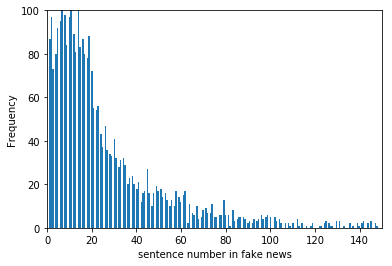

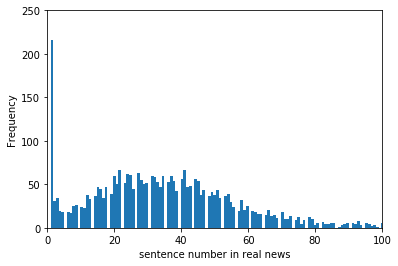

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.hist(df['sentence_count'], bins=2000)
plt.xlabel('sentence number in all news')
plt.ylabel('Frequency')
plt.axis([0, 150,  0, 300])
plt.show()

plt.hist(df_fake['sentence_count'], bins=2000)
plt.xlabel('sentence number in fake news')
plt.ylabel('Frequency')
plt.axis([0, 150,  0, 100])
plt.show()

plt.hist(df_real['sentence_count'], bins=500)
plt.xlabel('sentence number in real news')
plt.ylabel('Frequency')
plt.axis([0, 100,  0, 250])
plt.show()

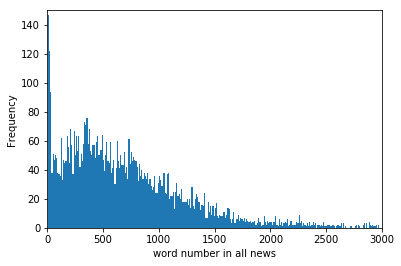

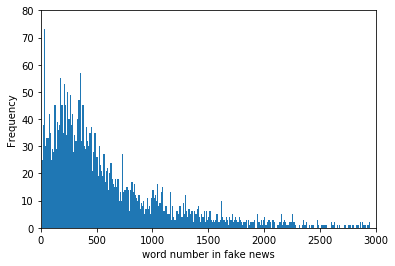

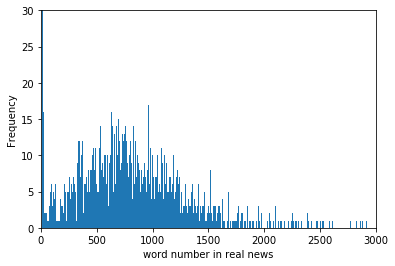

In [38]:
plt.hist(df['word_count'], bins=2000)
plt.xlabel('word number in all news')
plt.ylabel('Frequency')
plt.axis([0, 3000, 0, 150])
plt.show()

plt.hist(df_fake['word_count'], bins=2000)
plt.xlabel('word number in fake news')
plt.ylabel('Frequency')
plt.axis([0, 3000, 0, 80])
plt.show()

plt.hist(df_real['word_count'], bins=2000)
plt.xlabel('word number in real news')
plt.ylabel('Frequency')
plt.axis([0, 3000, 0, 30])
plt.show()

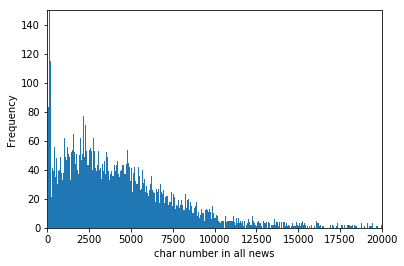

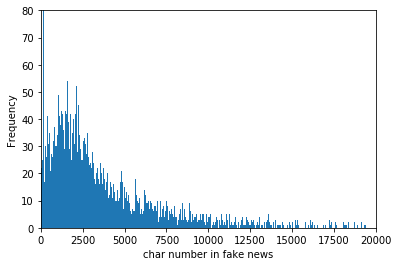

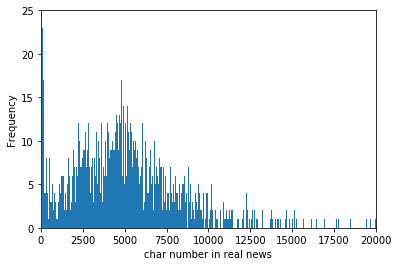

In [41]:
plt.hist(df['char_count'], bins=2000)
plt.xlabel('char number in all news')
plt.ylabel('Frequency')
plt.axis([0, 20000, 0, 150])
plt.show()

plt.hist(df_fake['char_count'], bins=2000)
plt.xlabel('char number in fake news')
plt.ylabel('Frequency')
plt.axis([0, 20000, 0, 80])
plt.show()

plt.hist(df_real['char_count'], bins=2000)
plt.xlabel('char number in real news')
plt.ylabel('Frequency')
plt.axis([0, 20000, 0, 25])
plt.show()

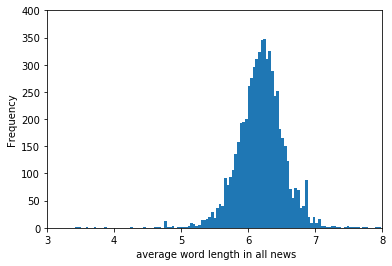

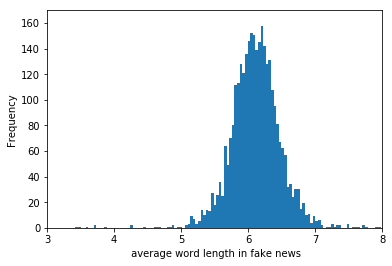

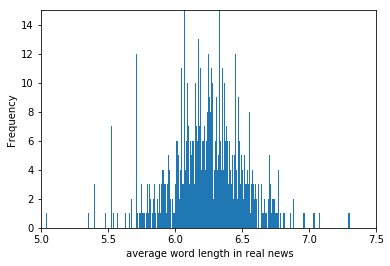

In [46]:
plt.hist(df['avg_word'], bins=2000)
plt.xlabel(' average word length in all news')
plt.ylabel('Frequency')
plt.axis([3, 8, 0, 400])
plt.show()

plt.hist(df_fake['avg_word'], bins=2000)
plt.xlabel(' average word length in fake news')
plt.ylabel('Frequency')
plt.axis([3, 8, 0, 170])
plt.show()

plt.hist(df_real['avg_word'], bins=2000)
plt.xlabel(' average word length in real news')
plt.ylabel('Frequency')
plt.axis([5, 7.5, 0, 15])
plt.show()

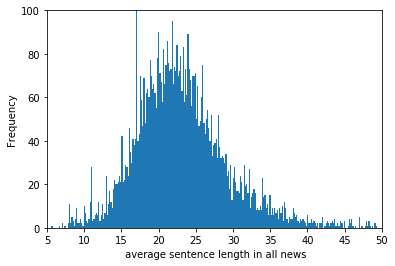

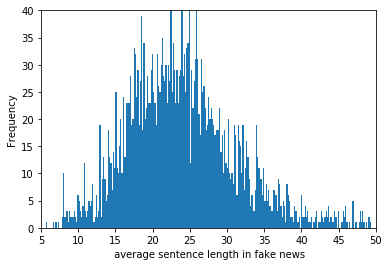

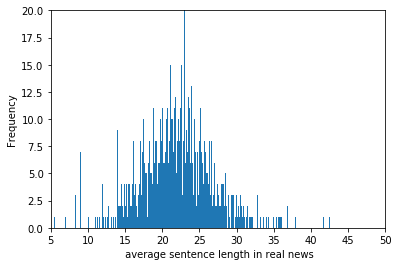

In [49]:
plt.hist(df['avg_sentence'], bins=2000)
plt.xlabel(' average sentence length in all news')
plt.ylabel('Frequency')
plt.axis([5, 50, 0, 100])
plt.show()

plt.hist(df_fake['avg_sentence'], bins=2000)
plt.xlabel(' average sentence length in fake news')
plt.ylabel('Frequency')
plt.axis([5, 50, 0, 40])
plt.show()

plt.hist(df_real['avg_sentence'], bins=2000)
plt.xlabel(' average sentence length in real news')
plt.ylabel('Frequency')
plt.axis([5, 50, 0, 20])
plt.show()

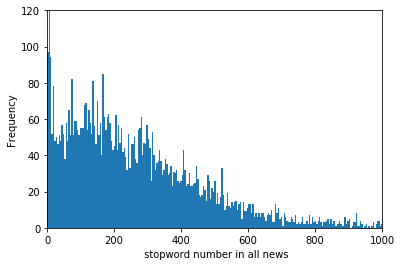

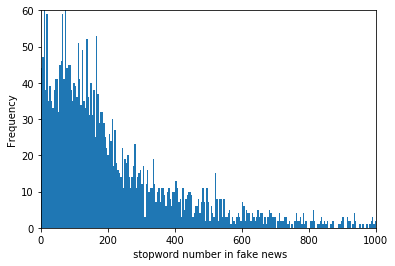

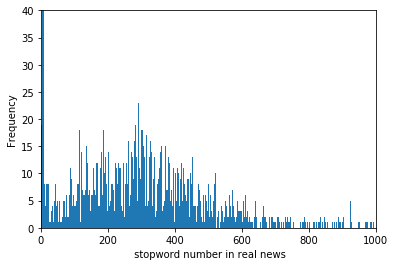

In [51]:
plt.hist(df['stopwords'], bins=2000)
plt.xlabel(' stopword number in all news')
plt.ylabel('Frequency')
plt.axis([0, 1000, 0, 120])
plt.show()

plt.hist(df_fake['stopwords'], bins=2000)
plt.xlabel(' stopword number in fake news')
plt.ylabel('Frequency')
plt.axis([0, 1000, 0, 60])
plt.show()

plt.hist(df_real['stopwords'], bins=2000)
plt.xlabel(' stopword number in real news')
plt.ylabel('Frequency')
plt.axis([0, 1000, 0, 40])
plt.show()

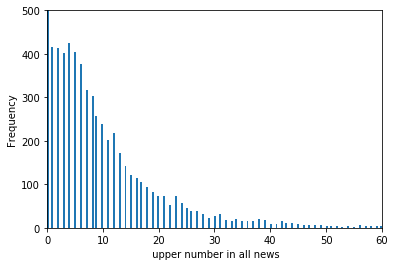

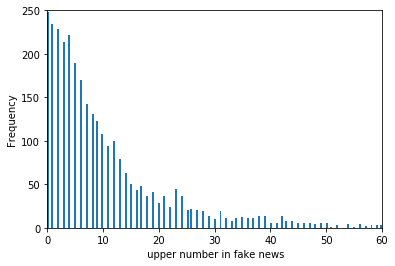

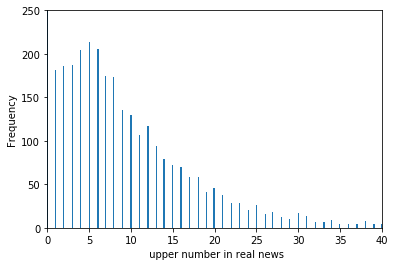

In [56]:
plt.hist(df['upper'], bins=2000)
plt.xlabel(' upper number in all news')
plt.ylabel('Frequency')
plt.axis([0, 60, 0, 500])
plt.show()

plt.hist(df_fake['upper'], bins=2000)
plt.xlabel(' upper number in fake news')
plt.ylabel('Frequency')
plt.axis([0, 60, 0, 250])
plt.show()

plt.hist(df_real['upper'], bins=1000)
plt.xlabel(' upper number in real news')
plt.ylabel('Frequency')
plt.axis([0, 40, 0,250])
plt.show()

In [60]:
df = pd.read_csv('data/fake_or_real_news.csv')

#替换列名
df.rename(columns={"label":"fake"}, inplace=True)
label_map = {"FAKE": 1, "REAL": 0}
df['fake'] = df['fake'].map(label_map)

#丢掉非英文的
def return_lang(x):
    try:
        language = detect_langs(x)[0].lang
    except Exception:
        language = 'other'
    return language
df['language'] = df['text'].apply(return_lang)


df = df[df['language']=='en']

#丢掉无用的列
df = df.drop(['Unnamed: 0','title_vectors','language','text'],axis=1)

df = df.reset_index(drop=True)

In [62]:
import nltk
from nltk.corpus import stopwords

#title
#统计单词的数量
df['word_count']=df['title'].apply(lambda x:len(str(x).split(" ")))
#统计文章总长度
df['char_count']=df['title'].str.len()
#统计文章平均一个单词的字符长度
df['avg_word']=df.apply(lambda x:x['char_count']/x['word_count'],axis=1)
#停用词数量
stop=stopwords.words('english')
df['stopwords']=df['title'].apply(lambda sen:len([x for x in sen.split() if x in stop]))
#大写字母数量
df['upper']=df['title'].apply(lambda sen:len([x for x in sen.split() if x.isupper()]))

In [80]:
df_fake=df[df['fake']==1]
df_real=df[df['fake']==0]

In [81]:
df

,title,fake,word_count,char_count,avg_word,stopwords,upper
0,You Can Smell Hillary’s Fear,1,5,28,5.600000,0,0
1,Watch The Exact Moment Paul Ryan Committed Pol...,1,14,85,6.071429,0,2
2,Kerry to go to Paris in gesture of sympathy,0,9,43,4.777778,4,0
3,Bernie supporters on Twitter erupt in anger ag...,1,15,84,5.600000,5,1
4,The Battle of New York: Why This Primary Matters,0,9,48,5.333333,1,0
5,"Tehran, USA",1,2,11,5.500000,0,1
6,Girl Horrified At What She Watches Boyfriend D...,1,13,73,5.615385,0,0
7,‘Britain’s Schindler’ Dies at 106,0,5,33,6.600000,1,0
8,Fact check: Trump and Clinton at the 'commande...,0,9,63,7.000000,3,0
9,Iran reportedly makes new push for uranium con...,0,11,71,6.454545,2,0


In [82]:
df_fake

,title,fake,word_count,char_count,avg_word,stopwords,upper
0,You Can Smell Hillary’s Fear,1,5,28,5.600000,0,0
1,Watch The Exact Moment Paul Ryan Committed Pol...,1,14,85,6.071429,0,2
3,Bernie supporters on Twitter erupt in anger ag...,1,15,84,5.600000,5,1
5,"Tehran, USA",1,2,11,5.500000,0,1
6,Girl Horrified At What She Watches Boyfriend D...,1,13,73,5.615385,0,0
12,"Strong Solar Storm, Tech Risks Today | S0 News...",1,11,66,6.000000,0,2
13,10 Ways America Is Preparing for World War 3,1,9,44,4.888889,1,0
16,Shocking! Michele Obama & Hillary Caught Glamo...,1,10,72,7.200000,0,0
17,Hillary Clinton in HUGE Trouble After America ...,1,18,113,6.277778,3,5
21,Episode #160 – SUNDAY WIRE: ‘Hail to the Deplo...,1,14,80,5.714286,3,3


In [83]:
df_real

,title,fake,word_count,char_count,avg_word,stopwords,upper
2,Kerry to go to Paris in gesture of sympathy,0,9,43,4.777778,4,0
4,The Battle of New York: Why This Primary Matters,0,9,48,5.333333,1,0
7,‘Britain’s Schindler’ Dies at 106,0,5,33,6.600000,1,0
8,Fact check: Trump and Clinton at the 'commande...,0,9,63,7.000000,3,0
9,Iran reportedly makes new push for uranium con...,0,11,71,6.454545,2,0
10,"With all three Clintons in Iowa, a glimpse at ...",0,17,97,5.705882,7,0
11,Donald Trump’s Shockingly Weak Delegate Game S...,0,10,67,6.700000,0,0
14,"Trump takes on Cruz, but lightly",0,6,32,5.333333,2,0
15,How women lead differently,0,4,26,6.500000,0,0
18,What's in that Iran bill that Obama doesn't like?,0,9,49,5.444444,3,0


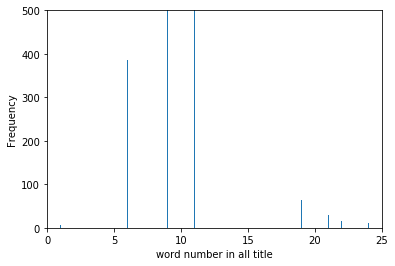

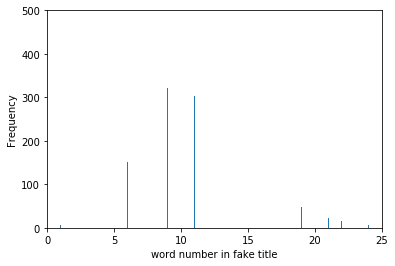

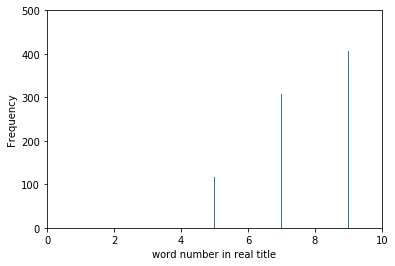

In [70]:
plt.hist(df['word_count'], bins=2000)
plt.xlabel('word number in all title')
plt.ylabel('Frequency')
plt.axis([0, 25, 0, 500])
plt.show()

plt.hist(df_fake['word_count'], bins=2000)
plt.xlabel('word number in fake title')
plt.ylabel('Frequency')
plt.axis([0, 25, 0, 500])
plt.show()

plt.hist(df_real['word_count'], bins=2000)
plt.xlabel('word number in real title')
plt.ylabel('Frequency')
plt.axis([0, 10, 0, 500])
plt.show()


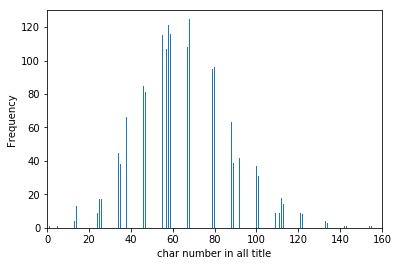

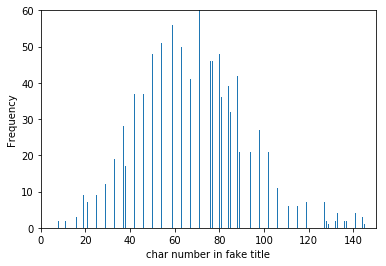

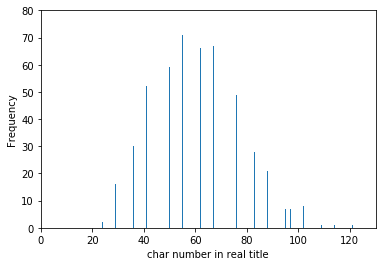

In [74]:
plt.hist(df['char_count'], bins=2000)
plt.xlabel('char number in all title')
plt.ylabel('Frequency')
plt.axis([0, 160, 0, 130])
plt.show()

plt.hist(df_fake['char_count'], bins=2000)
plt.xlabel('char number in fake title')
plt.ylabel('Frequency')
plt.axis([0, 150, 0, 60])
plt.show()

plt.hist(df_real['char_count'], bins=2000)
plt.xlabel('char number in real title')
plt.ylabel('Frequency')
plt.axis([0, 130, 0, 80])
plt.show()

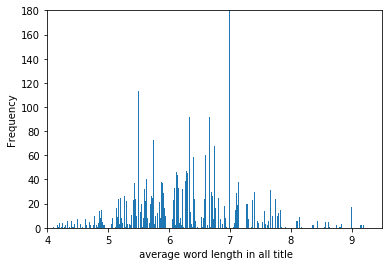

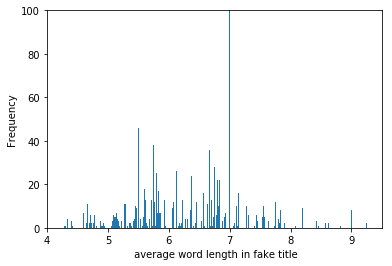

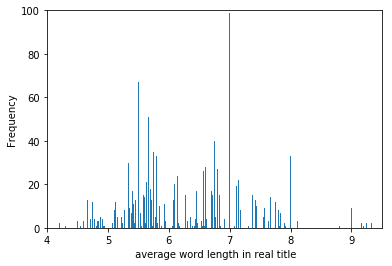

In [77]:
plt.hist(df['avg_word'], bins=2000)
plt.xlabel(' average word length in all title')
plt.ylabel('Frequency')
plt.axis([4, 9.5, 0, 180])
plt.show()

plt.hist(df_fake['avg_word'], bins=2000)
plt.xlabel(' average word length in fake title')
plt.ylabel('Frequency')
plt.axis([4, 9.5, 0, 100])
plt.show()

plt.hist(df_real['avg_word'], bins=2000)
plt.xlabel(' average word length in real title')
plt.ylabel('Frequency')
plt.axis([4, 9.5, 0, 100])
plt.show()

In [19]:
df = pd.read_csv('data/fake_or_real_news.csv')

#替换列名
df.rename(columns={"label":"fake"}, inplace=True)
label_map = {"FAKE": 1, "REAL": 0}
df['fake'] = df['fake'].map(label_map)

#丢掉非英文的
def return_lang(x):
    try:
        language = detect_langs(x)[0].lang
    except Exception:
        language = 'other'
    return language
df['language'] = df['text'].apply(return_lang)


df = df[df['language']=='en']

df['title_text']=df.apply(lambda x:x['title']+'. '+x['text'],axis=1)

#丢掉无用的列
#df = df.drop(['Unnamed: 0','title_vectors','language','title','text'],axis=1)

df = df.reset_index(drop=True)

In [20]:
#特殊字符数量
df['hashtags']=df['title_text'].apply(lambda sen:len([x for x in sen.split() if x.startswith("#") or x.startswith("@")]))
#数字数量
df['numerics']=df['title_text'].apply(lambda sen:len([x for x in sen.split() if x.isdigit()]))

import re

#正则表达式去掉一些无用的形式
def execute(x):
    temp=x
    pat1 = "[a-zA-Z]+'t"
    #否定词全部变为not
    temp = re.sub(pat1, 'not', temp)
    pat2 = "[a-zA-Z]+’t"
    #否定词全部变为not
    temp = re.sub(pat2, 'not', temp)
    #邮箱地址
    pat3="[\w!#$%&'*+/=?^_`{|}~-]+(?:\.[\w!#$%&'*+/=?^_`{|}~-]+)*@(?:[\w](?:[\w-]*[\w])?\.)+[\w](?:[\w-]*[\w])?"
    temp = re.sub(pat3, 'email', temp)
    #url网址
    pat4="[a-zA-z]+://[^\s]*"
    temp = re.sub(pat4, 'url', temp)
    #日期
    pat5="([0-9]{3}[1-9]|[0-9]{2}[1-9][0-9]{1}|[0-9]{1}[1-9][0-9]{2}|[1-9][0-9]{3})-(((0[13578]|1[02])-(0[1-9]|[12][0-9]|3[01]))|((0[469]|11)-(0[1-9]|[12][0-9]|30))|(02-(0[1-9]|[1][0-9]|2[0-8])))"
    temp = re.sub(pat5, 'date', temp)
    #电话号码 qq号码等 各种数字串
    pat6="[0-9]+"
    temp = re.sub(pat6, 'number', temp)
    return temp

def title_text_execute(x):
    return execute(x['title_text'])
    

df['title_text'] = df.apply(title_text_execute,axis=1)

In [21]:
import nltk
from nltk.corpus import stopwords

def splitSentence(paragraph):
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = tokenizer.tokenize(paragraph)
    return len(sentences)
#text

#统计句子的数量
df['sentence_count']=df['title_text'].apply(splitSentence)
#统计单词的数量
df['word_count']=df['title_text'].apply(lambda x:len(str(x).split(" ")))
#统计文章总长度
df['char_count']=df['title_text'].str.len()
#统计文章平均一个单词的字符长度
df['avg_word']=df.apply(lambda x:x['char_count']/x['word_count'],axis=1)
#统计文章平均一个句子的单词长度
df['avg_sentence']=df.apply(lambda x:x['word_count']/x['sentence_count'],axis=1)
#停用词数量
stop=stopwords.words('english')
df['stopwords']=df['title_text'].apply(lambda sen:len([x for x in sen.split() if x in stop]))
#大写字母数量
df['upper']=df['title_text'].apply(lambda sen:len([x for x in sen.split() if x.isupper()]))

In [22]:
df_fake=df[df['fake']==1]
df_real=df[df['fake']==0]

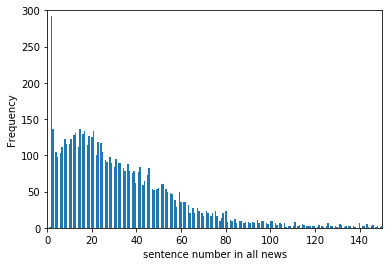

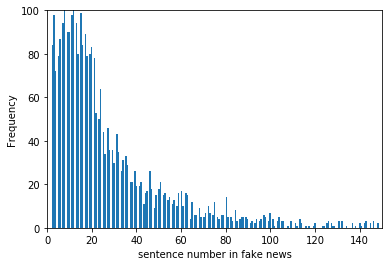

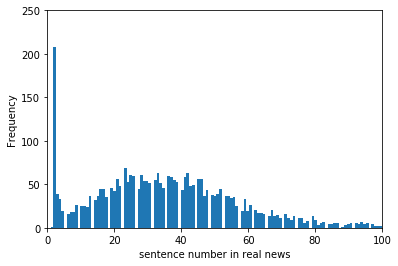

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.hist(df['sentence_count'], bins=2000)
plt.xlabel('sentence number in all news')
plt.ylabel('Frequency')
plt.axis([0, 150,  0, 300])
plt.show()

plt.hist(df_fake['sentence_count'], bins=2000)
plt.xlabel('sentence number in fake news')
plt.ylabel('Frequency')
plt.axis([0, 150,  0, 100])
plt.show()

plt.hist(df_real['sentence_count'], bins=500)
plt.xlabel('sentence number in real news')
plt.ylabel('Frequency')
plt.axis([0, 100,  0, 250])
plt.show()

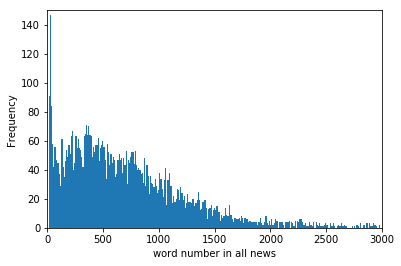

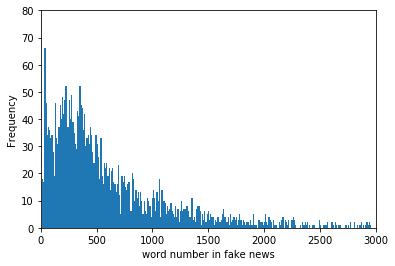

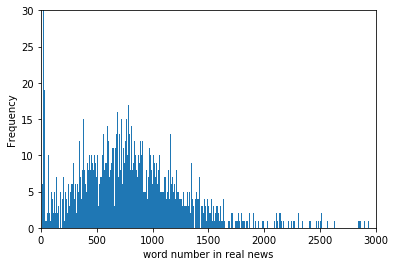

In [13]:
plt.hist(df['word_count'], bins=2000)
plt.xlabel('word number in all news')
plt.ylabel('Frequency')
plt.axis([0, 3000, 0, 150])
plt.show()

plt.hist(df_fake['word_count'], bins=2000)
plt.xlabel('word number in fake news')
plt.ylabel('Frequency')
plt.axis([0, 3000, 0, 80])
plt.show()

plt.hist(df_real['word_count'], bins=2000)
plt.xlabel('word number in real news')
plt.ylabel('Frequency')
plt.axis([0, 3000, 0, 30])
plt.show()

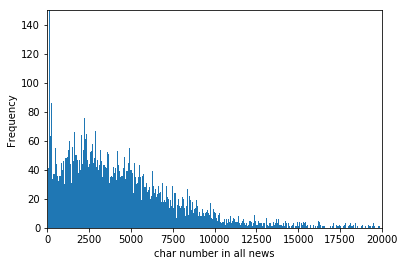

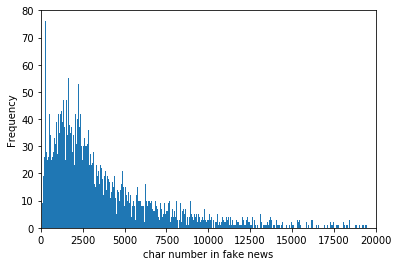

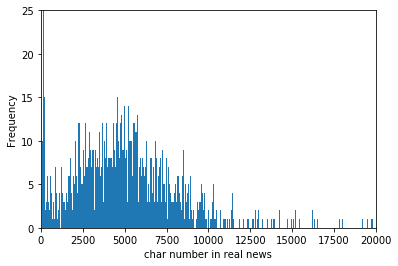

In [14]:
plt.hist(df['char_count'], bins=2000)
plt.xlabel('char number in all news')
plt.ylabel('Frequency')
plt.axis([0, 20000, 0, 150])
plt.show()

plt.hist(df_fake['char_count'], bins=2000)
plt.xlabel('char number in fake news')
plt.ylabel('Frequency')
plt.axis([0, 20000, 0, 80])
plt.show()

plt.hist(df_real['char_count'], bins=2000)
plt.xlabel('char number in real news')
plt.ylabel('Frequency')
plt.axis([0, 20000, 0, 25])
plt.show()

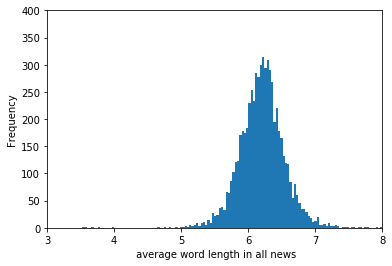

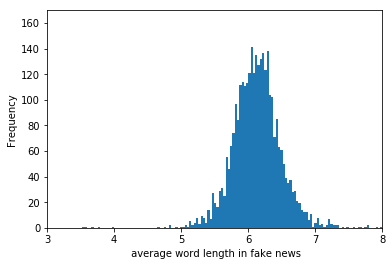

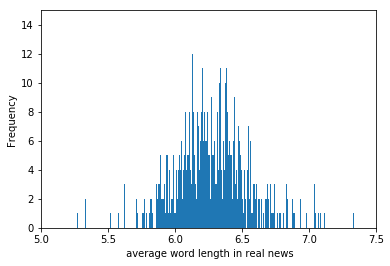

In [15]:
plt.hist(df['avg_word'], bins=2000)
plt.xlabel(' average word length in all news')
plt.ylabel('Frequency')
plt.axis([3, 8, 0, 400])
plt.show()

plt.hist(df_fake['avg_word'], bins=2000)
plt.xlabel(' average word length in fake news')
plt.ylabel('Frequency')
plt.axis([3, 8, 0, 170])
plt.show()

plt.hist(df_real['avg_word'], bins=2000)
plt.xlabel(' average word length in real news')
plt.ylabel('Frequency')
plt.axis([5, 7.5, 0, 15])
plt.show()

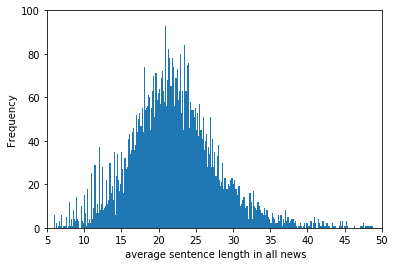

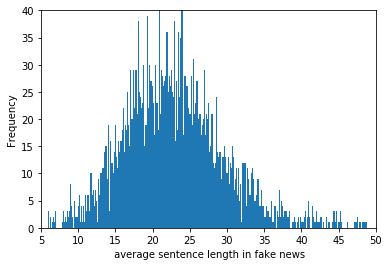

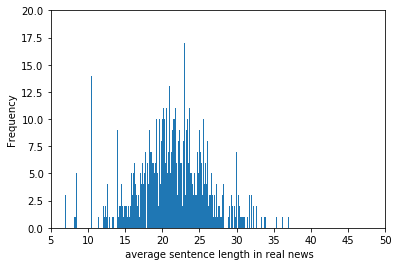

In [16]:
plt.hist(df['avg_sentence'], bins=2000)
plt.xlabel(' average sentence length in all news')
plt.ylabel('Frequency')
plt.axis([5, 50, 0, 100])
plt.show()

plt.hist(df_fake['avg_sentence'], bins=2000)
plt.xlabel(' average sentence length in fake news')
plt.ylabel('Frequency')
plt.axis([5, 50, 0, 40])
plt.show()

plt.hist(df_real['avg_sentence'], bins=2000)
plt.xlabel(' average sentence length in real news')
plt.ylabel('Frequency')
plt.axis([5, 50, 0, 20])
plt.show()

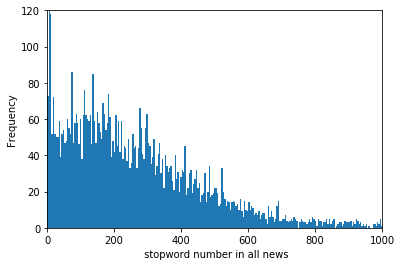

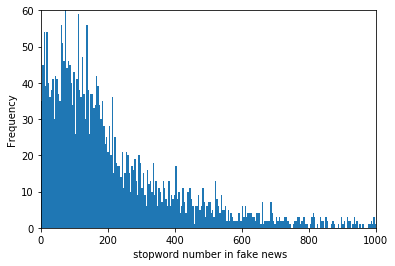

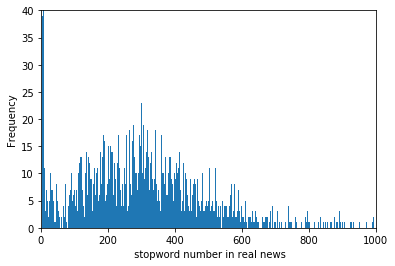

In [17]:
plt.hist(df['stopwords'], bins=2000)
plt.xlabel(' stopword number in all news')
plt.ylabel('Frequency')
plt.axis([0, 1000, 0, 120])
plt.show()

plt.hist(df_fake['stopwords'], bins=2000)
plt.xlabel(' stopword number in fake news')
plt.ylabel('Frequency')
plt.axis([0, 1000, 0, 60])
plt.show()

plt.hist(df_real['stopwords'], bins=2000)
plt.xlabel(' stopword number in real news')
plt.ylabel('Frequency')
plt.axis([0, 1000, 0, 40])
plt.show()


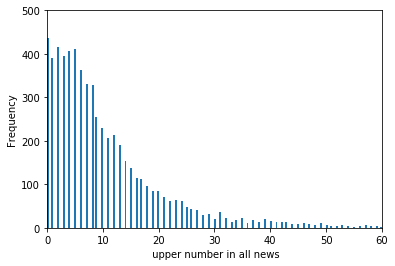

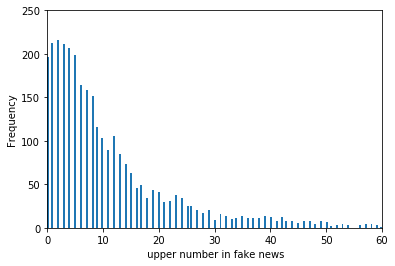

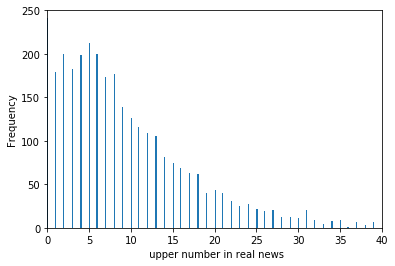

In [18]:
plt.hist(df['upper'], bins=2000)
plt.xlabel(' upper number in all news')
plt.ylabel('Frequency')
plt.axis([0, 60, 0, 500])
plt.show()

plt.hist(df_fake['upper'], bins=2000)
plt.xlabel(' upper number in fake news')
plt.ylabel('Frequency')
plt.axis([0, 60, 0, 250])
plt.show()

plt.hist(df_real['upper'], bins=1000)
plt.xlabel(' upper number in real news')
plt.ylabel('Frequency')
plt.axis([0, 40, 0,250])
plt.show()

In [26]:
df.to_csv("data/cleaned_fake_or_real_news.csv",index=False,sep=',')